**All Rights Reserved**

**Copyright (c) 2022 IRT Saint-Exupery**

🖊️ Authors : Adil Zouitine & Lucas Hervier

✉️ Emails*: adil.zouitine@irt-saintxupery.com & lucas.hervier@irt-saintexupery.com*

# 🏰 Project Lab: Deep Learning
## Lucas THIOLAS

**Scope of this evaluation:** Now that you have been in touch with a deep learning framework, it is time to learn to get comfortable with it. Thus, the first part of this evaluation will basically consist on applying what you previously saw to a new use-case: [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). In contrast, the second part of this evaluation will require you to make some investigation on your own as we will ask you to go further than what you have been taught yet.

**Evaluation criteria:** The two exercises will be equally important for your final grade. The 2 must be addressed, at least partially, or a penalty will be applied on your final grade. For this assignement you are expected to upload on the LMS platform a zip folder with the following folder name: `Name_Surname_DL_Project.zip`. This folder will contain a Jupyter Notebook: `Name_Surname_DL_Project.ipynb` that address both exercises and any additional relevant files that may be outcomes of the two exercises. In addition to the content, the format of the notebook will play an important part of your final grade: Correctly use the Markdown format to ease the readiness of the notebook, your code is correctly commented/documented, you provide insights/analysis to what may outcome a given cell, you clearly explain what you are doing and why, and so on...

⚠️**Warning:**

You can obviously use the Azure VM at your disposal for this challenge. However, we advise you to make prototypes either on google colab or on your local machine before deploying it in the VM. Indeed, you have a limited amount of time in Azure so do not use it for debugging but only when you are sure that your code will run smoothly on the VM.

## 🌉 Exercise 1: Transfer your knowledge

For this part, you will have to:

- Analyze the CIFAR-10 dataset
- Train several (at least 2) CNN models (you can change: the architecture, the optimizer, the training process, etc..)
- For each models you should: compute and save the relevant training metrics
- Compare every model you trained in terms of performance

As we won't redo all your trainings it is your duty to save your models' **weights** and to make sure that if you provide them in your folder we can reload the models, the corresponding metrics and play your notebook's analytical part without the need to retrain models.

```python
# create the model
model = NewModel()

# train the model
metrics = train(model)

# save the metrics and the models weights
...

# load what you have save so I can replay your notebook without
# playing the previous 3 steps
loaded_model = NewModel()
# load weights
...

# load metrics
...

# make some analysis
...
```

In [28]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Database extraction

We extract the CIFAR10 database and we normalize it.

We generate a dataloader for training and testing.

In [29]:
import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

#Train dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
#Test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# Network 1

We train a first neural network. We use a SGD optimizer with a learning rate of 0.001 and several convolution and linear layers.

In [31]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [32]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

We then train this model on the train dataset.

In [33]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 12000 == 11999:    # print every epoch
            print(f'[{epoch + 1}] loss: {running_loss / 12000:.3f}')
            running_loss = 0.0

PATH = './cifar_net1.pth'
torch.save(net.state_dict(), PATH)      #We save the trained weights

[1] loss: 1.730
[2] loss: 1.346
[3] loss: 1.216
[4] loss: 1.122
[5] loss: 1.057
[6] loss: 0.994
[7] loss: 0.951
[8] loss: 0.904
[9] loss: 0.864
[10] loss: 0.834


We can now evaluate our model with the test dataset to obtain the accuracy of the trained network.

In [34]:
net = Net()
net.load_state_dict(torch.load(PATH))   #We reload the weights for evaluation

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 63 %


We now determine the accuracy for each class of the dataset to determine which classes this network identifies easily and which ones it has more trouble with.

In [35]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
          if label == prediction:
                correct_pred[classes[label]] += 1
          total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Precision for class: {classname:5s} is {accuracy:.1f} %')


Precision for class: plane is 71.1 %
Precision for class: car   is 79.2 %
Precision for class: bird  is 54.8 %
Precision for class: cat   is 36.2 %
Precision for class: deer  is 64.1 %
Precision for class: dog   is 51.2 %
Precision for class: frog  is 72.3 %
Precision for class: horse is 64.5 %
Precision for class: ship  is 70.6 %
Precision for class: truck is 67.0 %


We now generate a confusion matrix

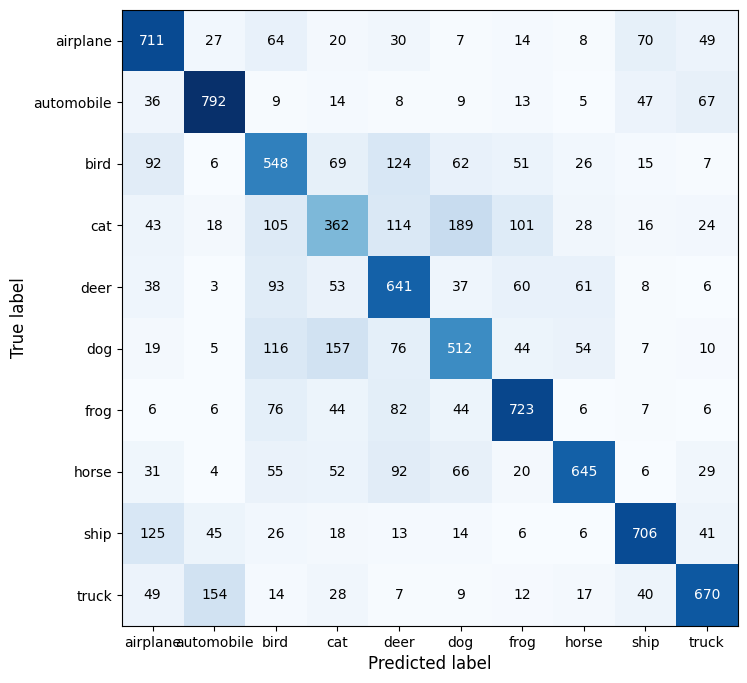

In [36]:
# Build confusion matrix
net.eval()

# Make predictions on the test set
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], fontsize=10)
ax.set_yticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], fontsize=10)
ax.set_xlabel('Predicted label', fontsize=12)
ax.set_ylabel('True label', fontsize=12)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

We can see that the model has learned has most of the predictions are right but it still makes a lot of errors, especially for animal pictures.

Now we can repeat all those steps for different networks.

# Network 2

We modify the previous network by changing the maxpool layer with an averagepool layer and switching to an Adam optimizer.

In [37]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.AvgPool2d(2, 2)        ##modif
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)      ##adam optimizer

In [38]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 12000 == 11999:    # print every epoch
            print(f'[{epoch + 1}] loss: {running_loss / 12000:.3f}')
            running_loss = 0.0

print('Finished Training')


PATH = './cifar_net2.pth'
torch.save(net.state_dict(), PATH)

[1] loss: 1.646
[2] loss: 1.393
[3] loss: 1.288
[4] loss: 1.217
[5] loss: 1.160
[6] loss: 1.117
[7] loss: 1.077
[8] loss: 1.043
[9] loss: 1.018
[10] loss: 0.995
Finished Training


In [39]:
net = Net()
net.load_state_dict(torch.load(PATH))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 60 %


In [40]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Precision for class: {classname:5s} is {accuracy:.1f} %')

Precision for class: plane is 68.2 %
Precision for class: car   is 81.4 %
Precision for class: bird  is 49.1 %
Precision for class: cat   is 41.2 %
Precision for class: deer  is 44.1 %
Precision for class: dog   is 51.1 %
Precision for class: frog  is 70.6 %
Precision for class: horse is 61.1 %
Precision for class: ship  is 70.4 %
Precision for class: truck is 67.7 %


We now generate the confusion matrix :

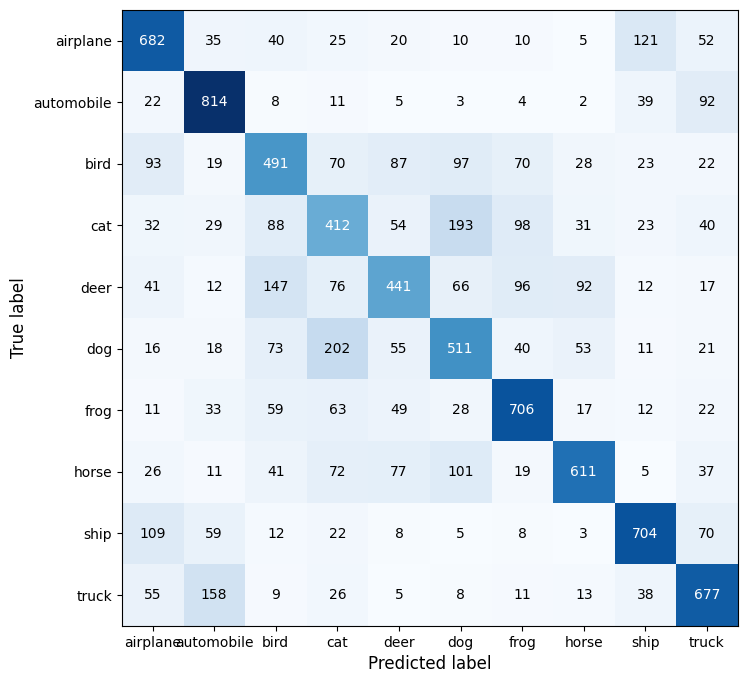

In [41]:
# Build confusion matrix
net.eval()

# Make predictions on the test set
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], fontsize=10)
ax.set_yticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], fontsize=10)
ax.set_xlabel('Predicted label', fontsize=12)
ax.set_ylabel('True label', fontsize=12)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

This model shows similar performances as the previous, it has a lot of errors on animal pictures.

# Network 3

We modify the previous network by adding a linear layer to the network.

In [42]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.AvgPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 64)       ##modif
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)      ##adam optimizer

In [43]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 12000 == 11999:    # print every epoch
            print(f'[{epoch + 1}] loss: {running_loss / 12000:.3f}')
            running_loss = 0.0

print('Finished Training')


PATH = './cifar_net3.pth'
torch.save(net.state_dict(), PATH)

[1] loss: 1.623
[2] loss: 1.359
[3] loss: 1.252
[4] loss: 1.182
[5] loss: 1.134
[6] loss: 1.086
[7] loss: 1.052
[8] loss: 1.023
[9] loss: 1.000
[10] loss: 0.973
Finished Training


In [44]:
net = Net()
net.load_state_dict(torch.load(PATH))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 59 %


In [45]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Precision for class: {classname:5s} is {accuracy:.1f} %')

Precision for class: plane is 66.0 %
Precision for class: car   is 65.9 %
Precision for class: bird  is 46.7 %
Precision for class: cat   is 44.1 %
Precision for class: deer  is 46.0 %
Precision for class: dog   is 56.9 %
Precision for class: frog  is 71.7 %
Precision for class: horse is 69.1 %
Precision for class: ship  is 69.0 %
Precision for class: truck is 63.8 %


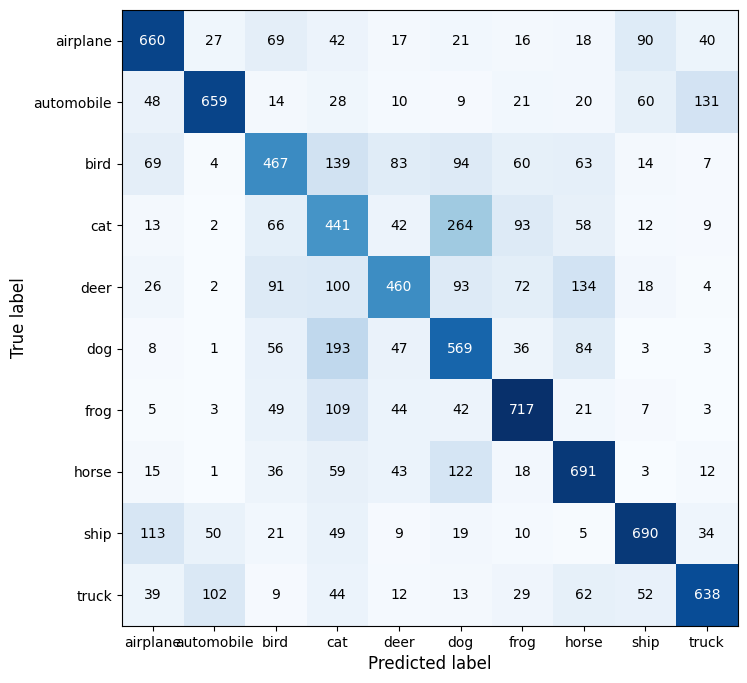

In [46]:
# Build confusion matrix
net.eval()

# Make predictions on the test set
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], fontsize=10)
ax.set_yticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], fontsize=10)
ax.set_xlabel('Predicted label', fontsize=12)
ax.set_ylabel('True label', fontsize=12)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

This model shows similar performances to the two previous models.

# Network 4

We test a more complex network with more layers (this model was inspired from someone's else model).

In [10]:
#Inspiré d'un reseau d'Audric Moussaoui
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64) 
        self.conv2 = nn.Conv2d(64,128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128) 
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256) 
        self.fc1 = nn.Linear(256*4*4, 512)
        self.bn4 = nn.BatchNorm1d(512) 
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU(inplace=True) 
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2) 

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = x.view(-1, 256*4*4)
        x = self.fc1(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)      ##adam optimizer

In [11]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 12000 == 11999:    # print every epoch
            print(f'[{epoch + 1}] loss: {running_loss / 12000:.3f}')
            running_loss = 0.0

print('Finished Training')


PATH = './cifar_net4.pth'
torch.save(net.state_dict(), PATH)

[1] loss: 1.472
[2] loss: 1.128
[3] loss: 0.972
[4] loss: 0.866
[5] loss: 0.782
[6] loss: 0.719
[7] loss: 0.656
[8] loss: 0.601
[9] loss: 0.555
[10] loss: 0.517
Finished Training


In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 71 %


In [13]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Precision for class: {classname:5s} is {accuracy:.1f} %')

Precision for class: plane is 68.2 %
Precision for class: car   is 88.2 %
Precision for class: bird  is 60.6 %
Precision for class: cat   is 48.0 %
Precision for class: deer  is 60.3 %
Precision for class: dog   is 65.9 %
Precision for class: frog  is 82.3 %
Precision for class: horse is 77.7 %
Precision for class: ship  is 90.9 %
Precision for class: truck is 77.6 %


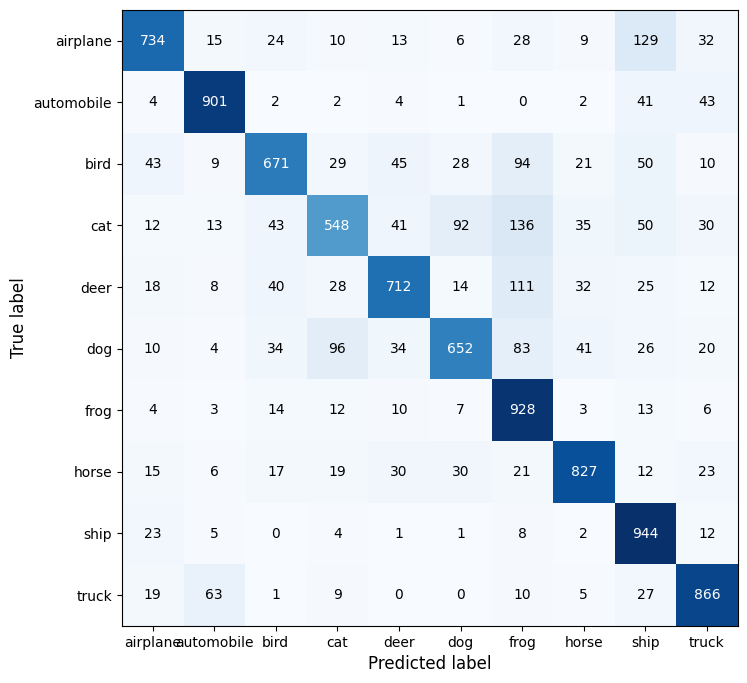

In [14]:
# Build confusion matrix
net.eval()

# Make predictions on the test set
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], fontsize=10)
ax.set_yticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], fontsize=10)
ax.set_xlabel('Predicted label', fontsize=12)
ax.set_ylabel('True label', fontsize=12)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

This network shows much better performances even though it still has difficulties with cat pictures.

# Conclusion

We can see that the first three models show pretty mediocre performances.
They have around 60% accuracy for 10 epochs. By looking more percisely their confusion matrix, they seem to have difficulties finding cats birds and dogs.

The fourth model shows much better performances, even though it still has difficulties detecting cats. We will use this trained network for the rest of the exercise.


## ⏰ Exercise 2: Time is money

As a starting point for this exercise you will need the best model you have on the first exercise. This will constitute your `baseline_model`. The main idea here is to be pragmatic. You are a big company that want to use a DL model but as time is money for you, you would like to have a DL model that got as little inference time as possible (*i.e.* time to make a prediction is low) without sacrificing too much of your model performance. So that is what you are gonna do:

First you will define a function that: gives you the meantime and the standard deviation for a given model to predict a batch (with a batch size you will choose) of test data over 10 batch predictions.

Explore (at least 2) the following options (or others if you want) to reduce inference time:

*   Pruning nn: [https://pytorch.org/docs/stable/generated/torch.nn.utils.prune.LnStructured.html#torch.nn.utils.prune.LnStructured](https://pytorch.org/docs/stable/generated/torch.nn.utils.prune.LnStructured.html#torch.nn.utils.prune.LnStructured)

  [https://intellabs.github.io/distiller/pruning.html](https://intellabs.github.io/distiller/pruning.html)

*   Neural network distillation:

  [https://intellabs.github.io/distiller/knowledge\_distillation.html](https://intellabs.github.io/distiller/knowledge_distillation.html) [https://arxiv.org/abs/1503.02531](https://arxiv.org/abs/1503.02531)

*   Weight Quantization:

  [https://pytorch.org/docs/stable/quantization.html](https://pytorch.org/docs/stable/quantization.html) 
  [https://huggingface.co/docs/optimum/concept\_guides/quantization](https://huggingface.co/docs/optimum/concept_guides/quantization)

*   Half precision: [https://pytorch.org/blog/accelerating-training-on-nvidia-gpus-with-pytorch-automatic-mixed-precision/](https://pytorch.org/blog/accelerating-training-on-nvidia-gpus-with-pytorch-automatic-mixed-precision/) (Warning: The GPU needs to support float16)

*   Model compilation:

  [https://pytorch.org/tutorials/intermediate/torch\_compile\_tutorial.html](https://pytorch.org/tutorials/intermediate/torch_compile_tutorial.html) (you need torch 2.0)

*   Depthwise convolution

  Mobil net paper trick [https://arxiv.org/pdf/1704.04861.pdf](https://arxiv.org/pdf/1704.04861.pdf)

You should compare the different models you obtain to each other on the two criteria: **inference time** and **test accuracy**. As for exercise one, I should be able to play your part by loading the models you trained without the need to retrain the models myself. When using an approach a short summary of what you are doing is expected. The final comparison should point out a model and explain why (is it better on the two criteria, do you have to make a trade-off, etc...).

# Predicton base time

We will first measure the inference of the best model on the test dataset

In [16]:
import time

#Inspiré d'Audric Moussaoui
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64) 
        self.conv2 = nn.Conv2d(64,128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128) 
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256) 
        self.fc1 = nn.Linear(256*4*4, 512)
        self.bn4 = nn.BatchNorm1d(512) 
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU(inplace=True) 
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2) 

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = x.view(-1, 256*4*4)
        x = self.fc1(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

net = Net()

PATH = './cifar_net4.pth'
torch.save(net.state_dict(), PATH)

## We now measure the time it takes the model to make prediction on the test dataset

t1 = time.time()

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)

t2 = time.time()

inference_time = t2 - t1
print(inference_time)

50.29692530632019


The model takes 50 seconds to make predictions on the test dataset composed of 10000 images. This is the delay we will attempt to reduce.

# Prunning nn

We will explore the prunning nn to try reduce the inference time by optimizing the prameters of the network.

In [ ]:
module = net.conv1
nn.prune.random_unstructured(module, name="weight", amount=0.3) #we prune the weights from the first convutionnal layer